In [3]:
import os
import scipy.stats as stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import pytz
from sklearn.utils import resample
%matplotlib inline
from matplotlib.ticker import NullFormatter
import chardet
from scipy.optimize import curve_fit

from sklearn import metrics

# from sklearn import metrics
# import Data_Processor as DP
# import importlib
# importlib.reload(DP)

Root = 'C:/Illisarvik/'

In [16]:
Names={'T12' : 'Tundra',
       'B6' : 'Peat Plateau',
       'C3' : 'Low Willow',
       'E2' : 'Dense Willow',
       'E7' : 'Cotton Grass',
       'F3' : 'Wet Sedge 1',
       'F8' : 'Tall Willow',
       'H6' : 'Wet Sedge 2',
       'H7' : 'Grass',
       'J6' : 'Bare Ground'}

with open(Root+'ChamberData.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])
    
CD=pd.read_csv(Root+'ChamberData.csv',header=0,parse_dates={'datetime':[1,2]},
               index_col=['Class','Collar','datetime'],encoding=result['encoding'])

CD['SiteName'] = ' '


CD['CH4 Flux  (mg/m2/h)'] = CD['CH4 Flux  (nmol/m2/s)']*1e-6 * 16.04246 *3600

CD['CO2 Flux (g/m2/h)'] = CD['CO2 Flux (umol/m2/s)']*1e-6 * 44.0095 *3600
# print(CD['CO2 Flux (g/m2/s)'], CD['CO2 Flux (umol/m2/s)'])
level_values = CD.index.get_level_values
CDMean = CD.groupby([level_values(i) for i in [0,1]]).mean()
CDC = CD.groupby([level_values(i) for i in [0,1]]).count()
CDStd = CD.groupby([level_values(i) for i in [0,1]]).std()#**2#*stats.t.ppf(1-0.025,CDC)
# CDStd = CDStd/CDC**.5*stats.t.ppf(1-0.025,CDC)
CDmax = CD.groupby([level_values(i) for i in [0,1]]).max()
CDmin = CD.groupby([level_values(i) for i in [0,1]]).min()

FPArea = np.asanyarray([0.020768,0.353153,0.387214,0.108655,0.062773])
BasinArea = np.asanyarray([0.08514438609236921,0.15870928105098725,0.6021060853000659,0.1225742040717377,0])
Area = BasinArea
print(Area.sum())
Area = Area/Area.sum()
Key = np.asanyarray(['Sparse','Grass','Shrub','Sedge','Upland'])
Fractions={}
Fractions['area']={}
Fractions['CH4 Flux  (nmol/m2/s)']={}
Fractions['CO2 Flux (umol/m2/s)']={}
CDT = CD
i = 0
for area,key in zip(Area,Key):
    Fractions['area'][key] = area
    
Fractions['CH4 Flux  (mg/m2/h)']=Area*0
Fractions['CO2 Flux (g/m2/h)']=Area*0
Fractions['CH4 Flux  (mg/m2/h) std']=Area*0
Fractions['CO2 Flux (g/m2/h) std']=Area*0

Fractions['CH4 Flux  (mg/m2/h) c']=Area*0
Fractions['CO2 Flux (g/m2/h) c']=Area*0


# for Flux in ['CH4 Flux  (mg/m2/h)','CO2 Flux (g/m2/h)']:
#     print()
#     print(Flux)
#     D = []
#     idx = []
#     for Regressor in ['VWC','Press    Pa','soil temp','Air Temp °C']:
#         for Class in CD.index.get_level_values('Class').unique():
#             if Class != 'Sparse':
#                 Klass = CD.loc[(CD.index.get_level_values('Class')==Class)&\
#                            (CD.index.get_level_values('Collar')=='veg')].reset_index()
#             else:
#                 Klass = CD.loc[(CD.index.get_level_values('Class')==Class)&\
#                            (CD.index.get_level_values('Collar')=='unveg')].reset_index()
#             Klass[Regressor]=Klass[Regressor].astype(float)
#             slope, intercept, r_value, p_value, std_err = stats.linregress(Klass[Regressor],Klass[Flux])
#             if p_value < .1 and r_value**2>0.1:
#                 fig,ax = plt.subplots()
#                 ax.set_title(Regressor)
#                 ax.set_ylabel(Flux)
#                 Range = np.arange(Klass[Regressor].min(),Klass[Regressor].max())
# #                 plt.plot()
#                 ax.plot(Range,Range*slope+intercept,label = np.round(r_value,2))
#                 ax.scatter(Klass[Regressor],Klass[Flux],label=Class)
#                 d = [Regressor,p_value,r_value,r_value**2]
#                 D.append(d)
#                 idx.append(Class)
#                 ax.legend()
#             if Regressor == 'Air Temp °C':
#                 Temp = 9.77
#                 MSE = (metrics.mean_squared_error(Klass[Flux],Klass[Regressor]*slope+intercept))
#                 N = Klass[Flux].count()
#                 SE = (MSE*(1/N+((Temp-Klass[Regressor].mean())**2)/\
#                           ((Klass[Regressor]-Klass[Regressor].mean())**2).sum()))**.5
#                 T = stats.t.ppf(1-0.025,N)
#                 PI = SE*T
# #                 print()
# #                 print(Class,slope*Temp+intercept,PI)
            
# #             except:
# #                 pass

#     Scores = pd.DataFrame(data=D,index=idx,columns=['Regressor','p','r','r^2'])
#     print(Scores)

UTF-8-SIG
0.96853395651516


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imp

Collar  unveg   veg
Class              
Grass    10.9   9.5
Sedge    17.0  17.1
Shrub    22.0  18.7
Sparse    7.3   NaN
Upland   14.7  15.0
co2
Collar     unveg       veg
Class                     
Grass   1.286486  1.365703
Sedge   1.579589  1.848927
Shrub   0.933177  1.620782
Sparse  0.516495       NaN
Upland  0.654333  1.929729

Collar     unveg       veg
Class                     
Grass   0.186160  0.331127
Sedge   0.101398  0.277260
Shrub   0.096645  0.161603
Sparse  0.236067       NaN
Upland  0.088723  0.215471

ch4
Collar      unveg        veg
Class                       
Grass    0.136359   0.122436
Sedge   20.606219  12.814781
Shrub    1.027423   0.202713
Sparse   0.088362        NaN
Upland   0.149002   0.173259

Collar     unveg       veg
Class                     
Grass  -0.092405 -0.076234
Sedge   0.458558  2.188833
Shrub  -0.136297 -0.104533
Sparse -0.103378       NaN
Upland -0.163441 -0.149002


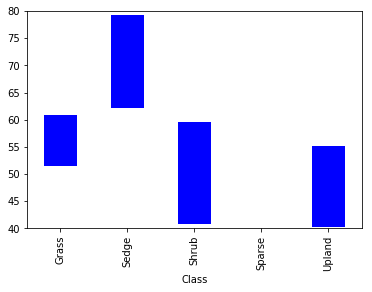

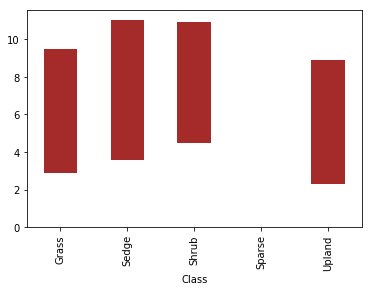

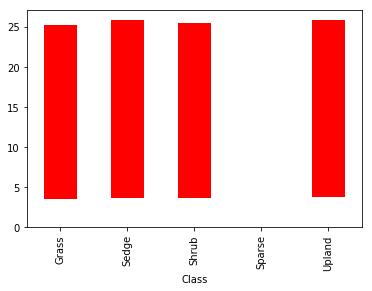

In [19]:
CDmax=CDmax.convert_objects(convert_numeric=True)
CDmin=CDmin.convert_objects(convert_numeric=True)
CDMean=CDMean.convert_objects(convert_numeric=True)
CDStd=CDStd.convert_objects(convert_numeric=True)

fig,ax=plt.subplots()
print(CDmax.unstack()['VWC']-CDmin.unstack()['VWC'])
CDmax.unstack()['VWC']['veg'].plot.bar(color='blue',ax=ax)
CDmin.unstack()['VWC']['veg'].plot.bar(color='white',ax=ax)
ax.set_ylim(40,80)

fig,ax=plt.subplots()
print('co2')
print(CDmax.unstack()['CO2 Flux (g/m2/h)'])
print()
print(CDmin.unstack()['CO2 Flux (g/m2/h)'])
CDmax.unstack()['soil temp']['veg'].plot.bar(color='brown',ax=ax)
CDmin.unstack()['soil temp']['veg'].plot.bar(color='white',ax=ax)


fig,ax=plt.subplots()
print()

print('ch4')
print(CDmax.unstack()['CH4 Flux  (mg/m2/h)'])
print()
print(CDmin.unstack()['CH4 Flux  (mg/m2/h)'])
CDmax.unstack()['Air Temp °C']['veg'].plot.bar(color='red',ax=ax)
CDmin.unstack()['Air Temp °C']['veg'].plot.bar(color='white',ax=ax)

# print()
# print('max',CDMax.unstack()[[,'CO2 Flux (g/m2/h)']]['veg'].mean())
# # print('min',CDMin.unstack()[['CH4 Flux  (mg/m2/h)','CO2 Flux (g/m2/h)']]['veg'].mean())

Collar   Class  unveg   veg
0        Grass   26.0  22.0
1        Sedge   26.0  22.0
2        Shrub   39.0  33.0
3       Sparse   11.0   NaN
4       Upland   26.0  22.0 Collar   Class     unveg       veg
0        Grass  0.054204  0.052251
1        Sedge  4.008423  2.328993
2        Shrub  0.276237  0.063211
3       Sparse  0.059631       NaN
4       Upland  0.071392  0.066765 Collar   Class     unveg       veg
0        Grass  0.000362  0.021592
1        Sedge  5.004827  6.385626
2        Shrub  0.156929  0.037118
3       Sparse  0.001465       NaN
4       Upland -0.031609 -0.062452


C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


Collar   Class  unveg   veg
0        Grass   26.0  22.0
1        Sedge   26.0  22.0
2        Shrub   39.0  33.0
3       Sparse   11.0   NaN
4       Upland   26.0  22.0 Collar   Class     unveg       veg
0        Grass  0.286359  0.297032
1        Sedge  0.320260  0.483254
2        Shrub  0.194495  0.286012
3       Sparse  0.085066       NaN
4       Upland  0.162820  0.497871 Collar   Class     unveg       veg
0        Grass  0.504034  0.746067
1        Sedge  0.365063  0.833162
2        Shrub  0.390886  0.532733
3       Sparse  0.298692       NaN
4       Upland  0.306936  0.817088
Scaled Flux:  CH4 Flux  (mg/m2/h) 0.8348837174045347 0.6780194386361909
Scaled Flux:  CO2 Flux (g/m2/h) 0.5851373148433312 0.6245135922197989
[0.02625816 0.12225457 0.33118254 0.10544204 0.        ]


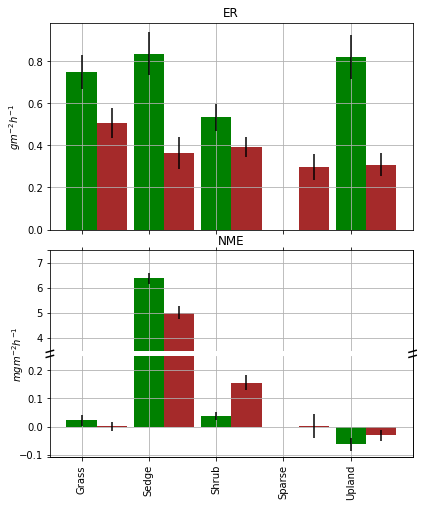

In [23]:

import matplotlib.gridspec as gridspec
# fig,ax = plt.subplots(2,1,figsize= (6.5,7.5))

fig = plt.figure(figsize=(6.5,8))
outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.1)
for Flux,i in zip(['CH4 Flux  (mg/m2/h)','CO2 Flux (g/m2/h)'],[0,1]):
    Tn = CDC[Flux].unstack()['unveg'].sum()
    # C
#     plt.title(Flux)
    M = CDMean[Flux].unstack().reset_index()
    C = CDC[Flux].unstack().reset_index()
    S = CDStd[Flux].unstack().reset_index()
    
    print(C,S,M)
    
    #**.5#/C*stats.t.ppf(1-0.025,C)
#     print(M.index)
#     print(CDMean[Flux].unstack()['veg'])
#     CDMean[Flux].unstack().plot.bar(stacked=False,yerr=CDStd[Flux].unstack(),ax=ax[i])
    if Flux == 'CH4 Flux  (mg/m2/h)':
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                        subplot_spec=outer[1], wspace=0.1, hspace=0.05)

        ax0 = plt.Subplot(fig, inner[1])
        ax1 = plt.Subplot(fig, inner[0])
        ax1.spines['bottom'].set_visible(False)
        ax0.spines['top'].set_visible(False)
        ax1.xaxis.tick_top()
        ax1.tick_params(labeltop='off')  # don't put tick labels at the top
        ax0.xaxis.tick_bottom()
        N=C['veg']
        
        ax0.bar(M.index,M['veg'],width=.45,
                yerr=S['veg']**.5/C['veg']*1.96,color='green')
        ax0.bar(M.index+.45,M['unveg'],width=.45,
                yerr=S['unveg']**.5/C['unveg']*1.96,color='brown')
        
#         ax0.bar(M.index,M['veg'],width=.45,yerr=S['veg'],color='green')#*stats.t.ppf(1-0.025, N)
#         ax0.bar(M.index+.45,M['unveg'],width=.45,yerr=S['unveg'],color='brown')#*stats.t.ppf(1-0.025, N)
        ax0.set_ylim(-.11,.25)
        ax0.grid()
#         print(M['veg'])
#         print(S['veg'])#*stats.t.ppf(1-0.025, N))
        L = ['']
        for v in M.Class.values:
            L.append(v)
        ax0.set_xticklabels(L,rotation=90)
#         ax0.set_yscale('symlog')
        ax1.bar(M.index,M['veg'],width=.45,
                yerr=S['veg']**.5/C['veg']**.5*stats.t.ppf(1-0.25,C['veg']),color='green')
        ax1.bar(M.index+.45,M['unveg'],width=.45,
                yerr=S['unveg']**.5/C['unveg']**.5*stats.t.ppf(1-0.25,C['unveg']),color='brown')
        ax1.set_ylim(3.45,7.5)
        ax1.grid()
        ax1.set_title('NME')# $(mg m^{-2} s^{-1})$')
        d = .01  # how big to make the diagonal lines in axes coordinates
        kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
        ax1.plot((-d, +d), (-d, +d), **kwargs)     
        ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

        kwargs.update(transform=ax0.transAxes)  
        ax0.plot((-d, +d), (1 - d, 1 + d), **kwargs)
        ax = plt.Subplot(fig, outer[1])
        ax.axes.get_xaxis().set_visible(False)
#         yl = ax.axes.get_yticks()
#         print(yl)
        ax.axes.set_yticks([0,1])
        ax.axes.set_yticklabels(['    ','    '])
#         ax.axes.get_yaxis().set_visible(False)
        ax.set_ylabel('${mg m^{-2} h^{-1}}$')
        fig.add_subplot(ax)
#         plt.sca(ax)
#         plt.axis('off')
        ax0.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
        fig.add_subplot(ax0)
        fig.add_subplot(ax1)
    else:
        ax = plt.Subplot(fig, outer[0])
        ax.bar(M.index,M['veg'],width=.45,
               yerr=S['veg']**.5/C['veg']**.5*stats.t.ppf(1-0.25,C['veg']),color='green')
        ax.bar(M.index+.45,M['unveg'],width=.45,
               yerr=S['unveg']**.5/C['unveg']**.5*stats.t.ppf(1-0.25,C['unveg']),color='brown')
        ax.grid()
        ax.tick_params(labelbottom='off')
#         print(M)
        ax.set_title('ER')# $(g m^{-2} s^{-1})$')
        ax.set_ylabel('${g m^{-2} h^{-1}}$')
        fig.add_subplot(ax)
        
#         ax[i].set_yscale('symlog')
#         ax[i].set_ylim(-0.25,8)
#     ax[i].grid()
    Tn = CDC[Flux].unstack()['unveg'].sum()
    Sum = 0
    Temp = CDMean[Flux].unstack()['unveg']
    Fractions[Flux][0] = Temp[Key[0]] * Fractions['area'][Key[0]]
    Temp = CDStd[Flux].unstack()['unveg']
    Fractions[Flux+' std'][0] = Temp[Key[0]] * Fractions['area'][Key[0]]
    Temp = CDC[Flux].unstack()['unveg']
    Fractions[Flux+' (mg/m2/h) c']=  Temp[Key[0]]/Tn
    
    Temp = CDMean[Flux].unstack()['veg']
    Fractions[Flux][1:] = Temp[Key[1:]] *Area[1:]
    Temp = CDStd[Flux].unstack()['veg']
    Fractions[Flux+' std'][1:] = Temp[Key[1:]] * Area[1:]
    Temp = CDC[Flux].unstack()['veg']
    Fractions[Flux+' (mg/m2/h) c']= Temp[Key[1:]]/Tn
    
#     print(Fractions[Flux+' std']*Fractions[Flux])
    plt.savefig('Fig2.png',dpi = 300)
N = 5
for Flux in ['CH4 Flux  (mg/m2/h)','CO2 Flux (g/m2/h)']:
    print('Scaled Flux: ',Flux,Fractions[Flux].sum(),
          Fractions[Flux+' std'].sum()**.5/(N**.5)*stats.t.ppf(1-0.025, N))
#     print(CDStd[Flux])
#     print(Fractions[Flux+' std'].sum(),)
# plt.show()
print(Fractions[Flux])

        CO2 Flux (g/m2/h)   SEM
Class                          
Grass                0.50  0.12
Sedge                0.37  0.13
Shrub                0.39  0.06
Sparse               0.30  0.06
Upland               0.31  0.07
Class
Grass     0.0
Sedge     0.0
Shrub     0.0
Sparse    0.0
Upland    0.0
Name: CO2 Flux (g/m2/h), dtype: float64
(128,)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
Grass  Sedge   -0.139  -0.3194  0.0414 False 
Grass  Shrub  -0.1131  -0.2778  0.0515 False 
Grass  Sparse -0.2053  -0.4393  0.0286 False 
Grass  Upland -0.1971  -0.3775 -0.0167  True 
Sedge  Shrub   0.0258  -0.1388  0.1905 False 
Sedge  Sparse -0.0664  -0.3003  0.1676 False 
Sedge  Upland -0.0581  -0.2385  0.1223 False 
Shrub  Sparse -0.0922  -0.3142  0.1298 False 
Shrub  Upland -0.0839  -0.2486  0.0807 False 
Sparse Upland  0.0082  -0.2257  0.2422 False 
---------------------------------------------


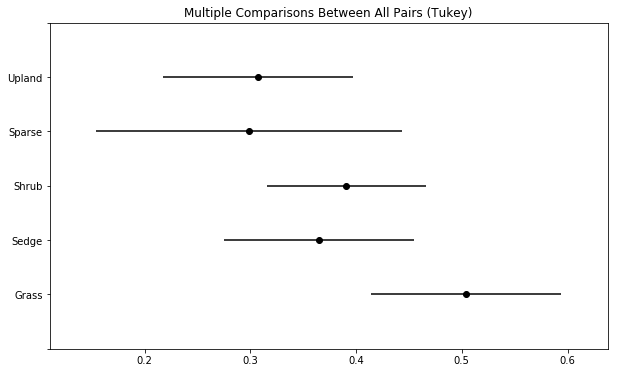

In [18]:

# Flux = 'CH4 Flux  (mg/m2/h)'
Flux = 'CO2 Flux (g/m2/h)'

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

CD2 = CD.swaplevel(i=0,j=1).loc['unveg'].reset_index()
# CD2 = CD2.loc[CD2['Class']!='Sedge']
Mean = CD2.groupby('Class').mean()
Mean['SEM'] = CD2.groupby('Class')[Flux].sem()*stats.t.ppf(1-0.025, CD2.groupby('Class')[Flux].count())
print(Mean[[Flux,'SEM']].round(2))

# CD2 = CD.swaplevel(i=0,j=1).loc['unveg'].reset_index()
# # CD2 = CD2.loc[CD2['Class']!='Sedge']
MeanV = CD2.groupby('Class').mean()
# MeanV['SEM'] = CD2.groupby('Class')[Flux].sem()*stats.t.ppf(1-0.025, CD2.groupby('Class')[Flux].count())
# print(MeanV[[Flux,'SEM']].round(2))

print(((Mean[Flux]-MeanV[Flux])/Mean[Flux]*100).round(2))

mc = MultiComparison(CD2[Flux], CD2['Class'])
print(CD2[Flux].shape)
result = mc.tukeyhsd(alpha=.05)
 
# print(mc.groupsunique)
result.plot_simultaneous()
print(result)
# print(CD)
# print(result.meandiffs)